# open3d tutorial 

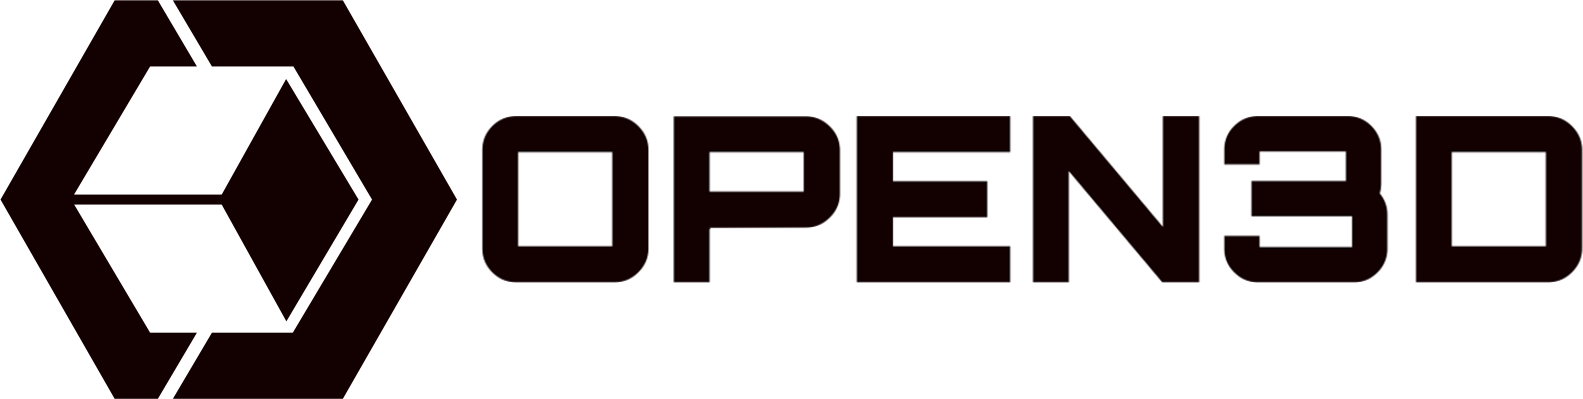

Open3D is an open-source library that supports rapid development of software that deals with 3D data

It was introduced by Qian-Yi Zhou, Jaesik Park and Vladlen Koltun – researchers at Intel Labs (research paper). 


http://www.open3d.org/wordpress/wp-content/paper.pdf





# Environment Setup:

conda create -n open3denv python=3.6

conda activate open3denv

conda install -c open3d-admin open3d==0.8.0.0

Download dataset from :    http://graphics.stanford.edu/data/3Dscanrep/


In [ ]:
# %pip install open3d wget

In [ ]:
import open3d as o3d

In [ ]:
import wget
url = 'https://raw.githubusercontent.com/PointCloudLibrary/pcl/master/test/bunny.pcd'
#filename = wget.download(url)

pcd = o3d.io.read_point_cloud("bunny.pcd")
print(pcd)

# open3d File point clouds file formats 

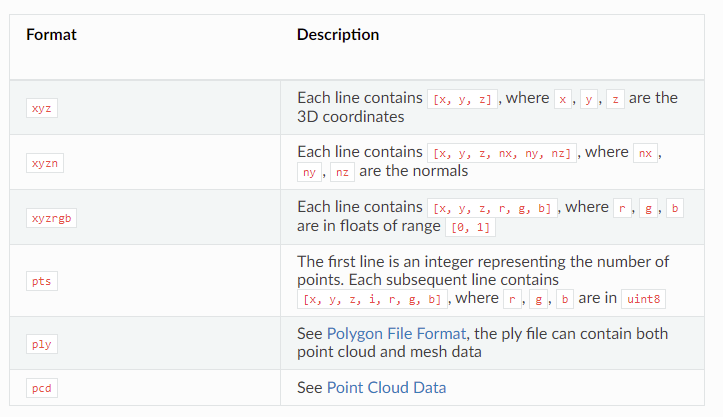

In [ ]:
#The code below writes a point cloud.

o3d.io.write_point_cloud("copy_of_bunny.pcd", pcd)

In [ ]:
pcd = o3d.io.read_point_cloud("sample.xyz", format='xyz')
print(pcd)

# Mesh

## open3d Mesh file formats 

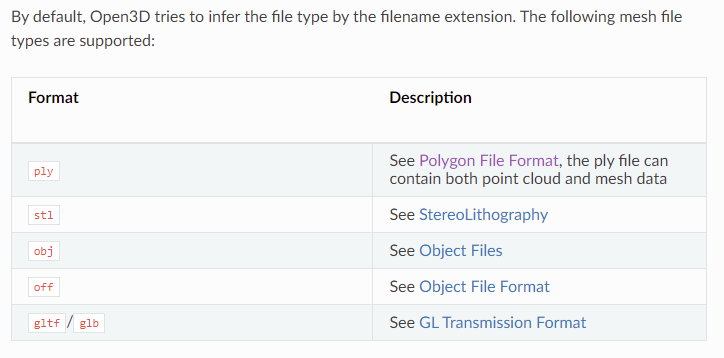

In [ ]:
# The code below reads and writes a mesh.
print("Testing IO for meshes ...")

#Function to read TriangleMesh from file
mesh = o3d.io.read_triangle_mesh("knot.ply")
print(mesh)

# Lets work on bunny dataset

In [ ]:
import open3d as o3d
import numpy as np
import PIL.Image
import IPython.display
import os
import urllib
import tarfile
import gzip
import zipfile
import shutil

#Download the point cloud using below command
import wget
url = 'http://graphics.stanford.edu/pub/3Dscanrep/bunny.tar.gz'
filename = wget.download(url)

In [ ]:
bunny_path = "bunny"
with tarfile.open(bunny_path + ".tar.gz") as tar:
            tar.extractall(path=os.path.dirname(bunny_path))

In [ ]:
bunny_path = "D:/open3D_env/bunny/reconstruction/bun_zipper.ply"
mesh = o3d.io.read_triangle_mesh(bunny_path)
mesh.compute_vertex_normals()

In [ ]:
mesh.compute_vertex_normals()
o3d.visualization.draw_geometries([mesh])

pcd = mesh.sample_points_uniformly(number_of_points=500)
o3d.visualization.draw_geometries([pcd])

# Download the Happy Buddha dataset
### Source: Stanford University Computer Graphics Laboratory

In [ ]:
#Download the Happy Buddha dataset
import wget
url = 'http://graphics.stanford.edu/pub/3Dscanrep/happy/happy_recon.tar.gz'
#filename = wget.download(url)

In [ ]:
budha_path = "happy_recon"
with tarfile.open(budha_path + ".tar.gz") as tar:
            tar.extractall(path=os.path.dirname(budha_path))
        
budha_path = "D:/open3D_env/happy_recon/happy_vrip.ply"
mesh_budha = o3d.io.read_triangle_mesh(budha_path)
mesh_budha.compute_vertex_normals()

In [ ]:
mesh_budha.compute_vertex_normals()
o3d.visualization.draw_geometries([mesh_budha])

pcd_budha = mesh_budha.sample_points_uniformly(number_of_points=500)
o3d.visualization.draw_geometries([pcd_budha])

# Dragon Dataset
### Source: Stanford University Computer Graphics Laboratory

In [ ]:
import wget
url = 'http://graphics.stanford.edu/pub/3Dscanrep/dragon/dragon_recon.tar.gz'
#filename = wget.download(url)

In [ ]:
dragon_path = "dragon_recon"
with tarfile.open(dragon_path + ".tar.gz") as tar:
            tar.extractall(path=os.path.dirname(dragon_path))
        
dragon_path = "D:/open3D_env/dragon_recon/dragon_vrip.ply"
mesh_dragon = o3d.io.read_triangle_mesh(dragon_path)
mesh_dragon.compute_vertex_normals()

In [ ]:
mesh_dragon.compute_vertex_normals()
o3d.visualization.draw_geometries([mesh_dragon])

pcd_dragon = mesh_dragon.sample_points_uniformly(number_of_points=500)
o3d.visualization.draw_geometries([pcd_dragon])

# Voxel downsampling

    1- It is a preprocessing step for point cloud processing tasks.
    2- It takes the point clouds and downsample. 
    3- Points which are in 1 voxels are averaged and we get 1 point after averaging.
    
### Why downsampling?
It makes the data of a more manageable size

Reduces the dimensionality of the data thus enabling in faster processing of the data (image)

Reducing the storage size of the data


In [ ]:
print("Downsample the point cloud with a voxel of 0.05")
downpcd = pcd_dragon.voxel_down_sample(voxel_size=0.05)
o3d.visualization.draw_geometries([downpcd],width=1920, height=1080, left=50, top=50)

In [ ]:
# Another example of Voxel downsampling

In [ ]:

import numpy as np
print("Load a ply point cloud, print it, and render it")

#read_point_cloud reads a point cloud from a file. It tries to decode the file based on the extension name.
pcd = o3d.io.read_point_cloud("fragment.ply")
print(pcd)
print(np.asarray(pcd.points))

#draw_geometries visualizes the point cloud. 
o3d.visualization.draw_geometries([pcd],width=1920, height=1080, left=50, top=50)

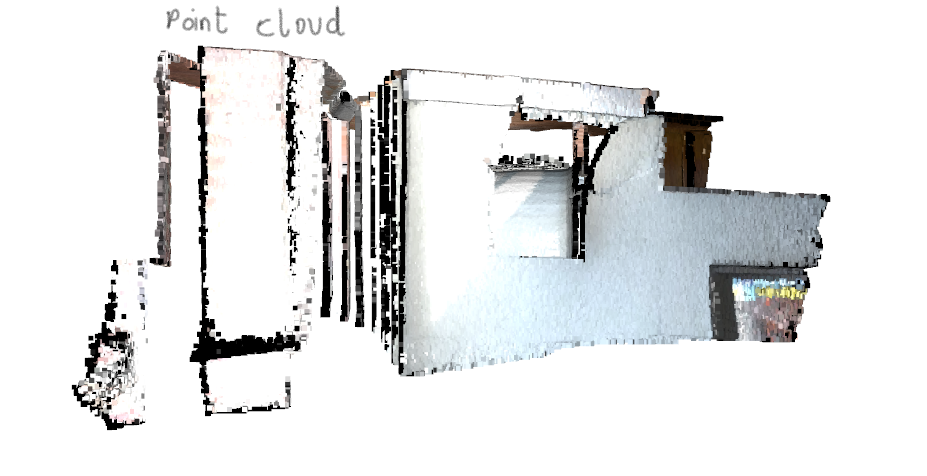

# Voxel downsampling

In [ ]:
print("Downsample the point cloud with a voxel of 0.05")
downpcd = pcd.voxel_down_sample(voxel_size=0.05)
o3d.visualization.draw_geometries([downpcd],width=1920, height=1080, left=50, top=50)

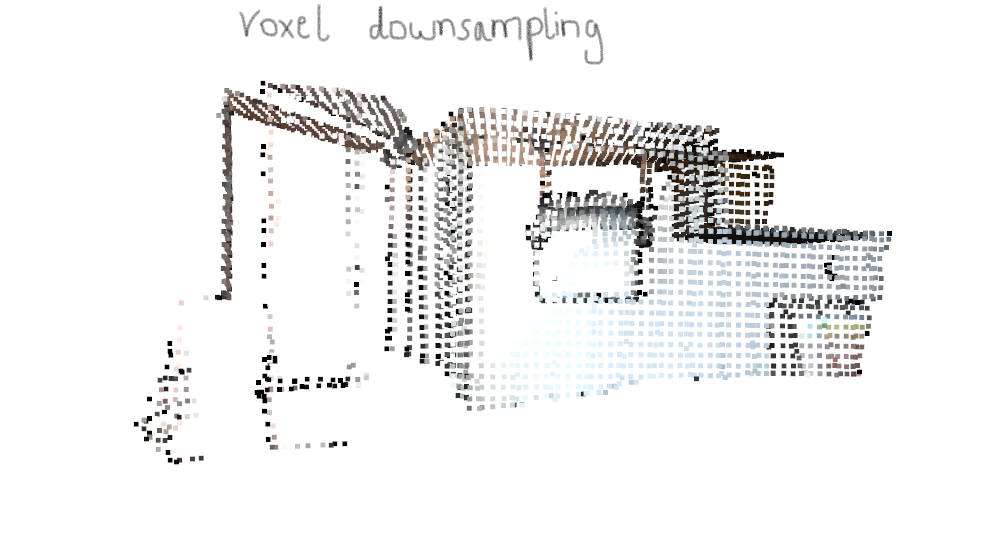

# Crop point cloud

In [ ]:
print("Load a polygon volume and use it to crop the original point cloud")

#read_selection_polygon_volume reads a json file that specifies polygon selection area. 
vol = o3d.visualization.read_selection_polygon_volume("cropped.json")

#vol.crop_point_cloud(pcd) filters out points. Only the chair remains.
chair = vol.crop_point_cloud(pcd)
o3d.visualization.draw_geometries([chair],width=1920, height=1080, left=50, top=50)

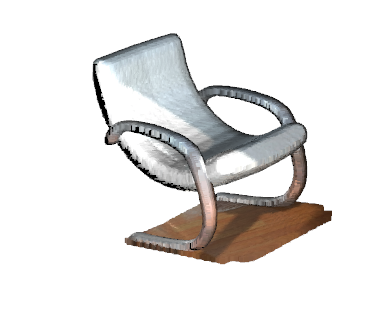

# Paint point cloud

In [ ]:
print("Paint chair")

#paint_uniform_color paints all the points to a uniform color. The color is in RGB space, [0, 1] range.
chair.paint_uniform_color([1, 0.706, 0])
o3d.visualization.draw_geometries([chair], width=1920, height=1080, left=50, top=50)

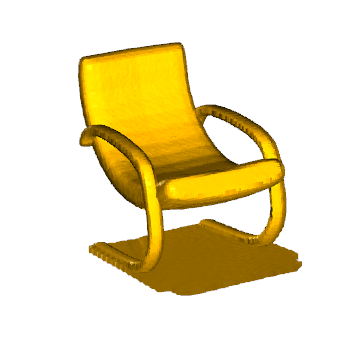

# Bounding Volumes
The PointCloud geometry type has bounding volumes as all other geometry types in Open3D. Currently, Open3D implements an AxisAlignedBoundingBox and an OrientedBoundingBox that can also be used to crop the geometry.


In [ ]:
aabb = chair.get_axis_aligned_bounding_box()
aabb.color = (1, 0, 0)
obb = chair.get_oriented_bounding_box()
obb.color = (0, 1, 0)
o3d.visualization.draw_geometries([chair, aabb, obb])

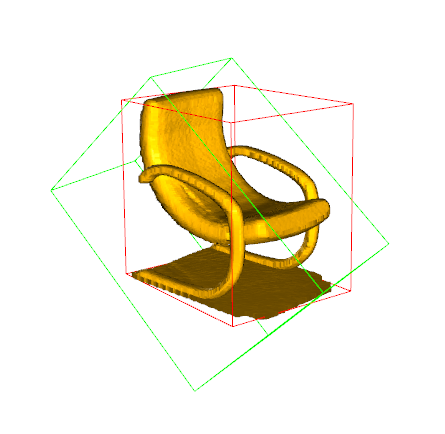

# Mesh
Open3D has a data structure for 3D triangle meshes called TriangleMesh. The code below shows how to read a triangle mesh from a ply file and print its vertices and triangles.

In [ ]:
#!pip install pillow

# import functions from open3d_tutorial.py 
import open3d_tutorial as o3dtut


print("Testing mesh in Open3D...")
mesh = o3dtut.get_knot_mesh()
print(mesh)
print('Vertices:')
print(np.asarray(mesh.vertices))
print('Triangles:')
print(np.asarray(mesh.triangles))

#The TriangleMesh class has a few data fields such as vertices and triangles. Open3D provides direct memory access to these fields via numpy.

In [ ]:
print("Try to render a mesh with normals (exist: " +str(mesh.has_vertex_normals()) + ") and colors (exist: " +str(mesh.has_vertex_colors()) + ")")
o3d.visualization.draw_geometries([mesh])
print("A mesh with no normals and no colors does not look good.")

In [ ]:
print("Computing normal and rendering it.")
mesh.compute_vertex_normals()
print(np.asarray(mesh.triangle_normals))
o3d.visualization.draw_geometries([mesh])

# Crop mesh
We remove half of the surface by directly operating on the triangle and triangle_normals data fields of the mesh. This is done via numpy.

In [ ]:
print("We make a partial mesh of only the first half triangles.")
#mesh1 = copy.deepcopy(mesh)
mesh1=mesh
mesh1.triangles = o3d.utility.Vector3iVector(
    np.asarray(mesh1.triangles)[:len(mesh1.triangles) // 2, :])
mesh1.triangle_normals = o3d.utility.Vector3dVector(
    np.asarray(mesh1.triangle_normals)[:len(mesh1.triangle_normals) // 2, :])
print(mesh1.triangles)
o3d.visualization.draw_geometries([mesh1])

# Paint mesh
paint_uniform_color paints the mesh with a uniform color. The color is in RGB space, [0, 1] range.

In [ ]:
print("Painting the mesh")
mesh1.paint_uniform_color([1, 0.706, 0])
o3d.visualization.draw_geometries([mesh1])